<a href="https://colab.research.google.com/github/er-anubhav/Bioscope/blob/main/WildYOLO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
pip install ultralytics

In [15]:
from ultralytics import YOLO

In [16]:
model=YOLO('yolov8n.pt')

In [17]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


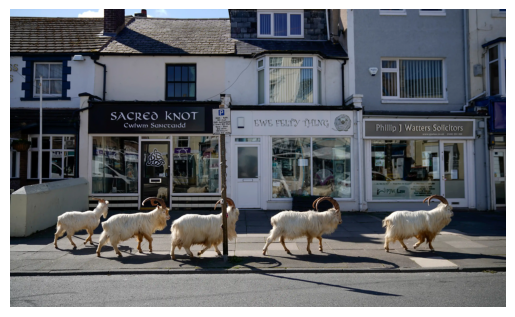

In [18]:
import matplotlib.pyplot as plt
import cv2

#Loading the image
img = cv2.imread('/content/drive/MyDrive/animals.webp')

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.axis('off')
plt.show()


image 1/1 /content/drive/MyDrive/premium_photo-1669740462478-135db9b990ea.webp: 640x448 3 elephants, 588.3ms
Speed: 4.4ms preprocess, 588.3ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 448)
Results saved to runs/detect/predict2
3 Elephant


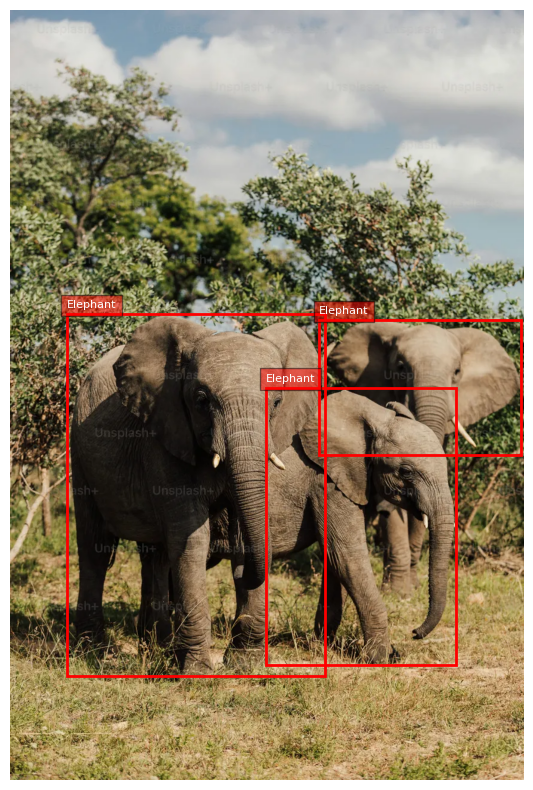

In [20]:
import cv2
import matplotlib.pyplot as plt

# Path to your image
image_path = '/content/drive/MyDrive/premium_photo-1669740462478-135db9b990ea.webp'

# Class IDs and their corresponding labels
class_labels = {
    15: "Cat", 16: "Dog", 17: "Horse", 18: "Sheep",
    19: "Cow", 20: "Elephant", 21: "Bear", 22: "Zebra",
    23: "Giraffe", 24: "Chicken", 25: "Duck", 26: "Goose",
    27: "Turkey", 28: "Pigeon", 29: "Parrot", 30: "Rabbit",
    31: "Tiger", 32: "Lion", 33: "Deer", 34: "Monkey",
    35: "Panda", 36: "Kangaroo", 37: "Leopard", 38: "Fox",
    39: "Wolf", 55: "Peacock"
}

# Perform prediction (detecting objects)
results = model.predict(
    source=image_path,  # Path to your image
    conf=0.4,  # Confidence threshold
    show=False,  # Disable automatic show
    save=True,  # Save the image with bounding boxes
    classes=list(class_labels.keys())  # Class IDs for all animals
)

# Initialize a dictionary to count detections for each class
detection_counts = {label: 0 for label in class_labels.values()}

# Process results to count each detected class
for result in results:
    boxes = result.boxes  # Assuming this is the correct way to access bounding boxes

    for box in boxes:
        cls = int(box.cls[0])  # Get the class ID
        if cls in class_labels:
            detection_counts[class_labels[cls]] += 1

# Print the counts for all detected classes
for animal, count in detection_counts.items():
    if count > 0:
        print(f"{count} {animal}")

# Visualize the detected image with bounding boxes
img = cv2.imread(image_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

if img is not None:
    plt.figure(figsize=(12, 8))
    plt.imshow(img_rgb)

    for result in results:
        boxes = result.boxes

        for box in boxes:
            x1, y1, x2, y2 = box.xyxy[0].tolist()  # Bounding box coordinates
            cls = int(box.cls[0])

            # Draw bounding boxes and labels for detected classes
            if cls in class_labels:
                label = class_labels[cls]
                rect = plt.Rectangle((x1, y1), x2 - x1, y2 - y1,
                                     fill=False, edgecolor='red', linewidth=2)
                plt.gca().add_patch(rect)

                # Add label above the bounding box
                plt.text(x1, y1 - 10, label,
                         color='white', fontsize=8,
                         bbox=dict(facecolor='red', alpha=0.5))

    plt.axis('off')
    plt.tight_layout()
    plt.show()
else:
    print("Error: Unable to load the image.")